In [1]:
import numpy as np

# 資料
arrival_rates = [
    [0.70, 0.70, 0.70, 0.70, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60, 0.56, 0.56, 0.56, 0.56, 0.56],
    [0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.08, 0.08, 0.08, 0.08, 0.08],
    [0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.08, 0.08, 0.08, 0.08, 0.08],
    [0.00, 0.00, 0.00, 0.00, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
    [0.00, 0.00, 0.00, 0.00, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14]
]

# 將資料轉換成 NumPy array
arrival_rates = np.array(arrival_rates)

# 列印到達率表格
print("到達率表格:")
print(arrival_rates.shape)


到達率表格:
(5, 30)


In [2]:
# 各個 p_j 值
p_values = [0, 200, 150, 120, 80]

In [3]:
# 狀態 x 的座位數
seats = 10

In [4]:
# 定義價值函數的判斷式
def calculate_value_function(arrival_rates, p_values, seats):
    
    time_space = len(arrival_rates[0])+1
    
    # 初始化價值函數矩陣
    value_function = np.zeros((seats+1, time_space))
    
    # 計算每個時間點下每個狀態的價值函數
    for t in range(1, time_space):
        for x in range(seats+1):
            if x == 0 or t == 0:  # 如果沒有剩餘座位
                value_function[x][t] = 0
            else:
                q_0 = arrival_rates[0][t-1]
                q_1 = arrival_rates[1][t-1]
                q_2 = arrival_rates[2][t-1]
                q_3 = arrival_rates[3][t-1]
                q_4 = arrival_rates[4][t-1]
                
                
                # 計算價值函數的判斷式
                value_function[x][t] = q_0 * value_function[x][t-1] + \
                                       q_1 * (p_values[1] + value_function[x-1][t-1]) + \
                                       q_2 * max(p_values[2] + value_function[x-1][t-1], 
                                                                value_function[x][t-1]) + \
                                        q_3 * max(p_values[3] + value_function[x-1][t-1], 
                                                                value_function[x][t-1]) + \
                                        q_4 * max(p_values[4] + value_function[x-1][t-1], 
                                                                value_function[x][t-1])
        print('time', t, 'prob', q_0, q_1, q_2, q_3, q_4)
    return value_function

# 計算價值函數
value_function = calculate_value_function(arrival_rates, p_values, seats)
print(value_function)
print(value_function.shape)

time 1 prob 0.7 0.15 0.15 0.0 0.0
time 2 prob 0.7 0.15 0.15 0.0 0.0
time 3 prob 0.7 0.15 0.15 0.0 0.0
time 4 prob 0.7 0.15 0.15 0.0 0.0
time 5 prob 0.4 0.14 0.14 0.16 0.16
time 6 prob 0.4 0.14 0.14 0.16 0.16
time 7 prob 0.4 0.14 0.14 0.16 0.16
time 8 prob 0.4 0.14 0.14 0.16 0.16
time 9 prob 0.4 0.14 0.14 0.16 0.16
time 10 prob 0.4 0.14 0.14 0.16 0.16
time 11 prob 0.4 0.14 0.14 0.16 0.16
time 12 prob 0.6 0.1 0.1 0.1 0.1
time 13 prob 0.6 0.1 0.1 0.1 0.1
time 14 prob 0.6 0.1 0.1 0.1 0.1
time 15 prob 0.6 0.1 0.1 0.1 0.1
time 16 prob 0.6 0.1 0.1 0.1 0.1
time 17 prob 0.6 0.1 0.1 0.1 0.1
time 18 prob 0.6 0.1 0.1 0.1 0.1
time 19 prob 0.6 0.06 0.06 0.14 0.14
time 20 prob 0.6 0.06 0.06 0.14 0.14
time 21 prob 0.6 0.06 0.06 0.14 0.14
time 22 prob 0.6 0.06 0.06 0.14 0.14
time 23 prob 0.6 0.06 0.06 0.14 0.14
time 24 prob 0.6 0.06 0.06 0.14 0.14
time 25 prob 0.6 0.06 0.06 0.14 0.14
time 26 prob 0.56 0.08 0.08 0.14 0.14
time 27 prob 0.56 0.08 0.08 0.14 0.14
time 28 prob 0.56 0.08 0.08 0.14 0.14
time 2

In [5]:
# 定義計算 Delta V_t(x) 的函式
def calculate_delta_value_function(value_function):
    
    # 初始化 Delta V 函數矩陣
    delta_value_function = np.zeros((len(value_function), len(value_function[0])))
    time_space = len(value_function[0])+1
    
    # 計算每個時間點下每個狀態的 Delta V 函數
    for t in range(1, time_space): 
        for x in range(1, len(value_function)):
            
            # 計算 Delta V_t(x)
            delta_value_function[x][t-1] = value_function[x][t-1] - value_function[x-1][t-1]
    
    return delta_value_function

# 計算 Delta V 函數
delta_value_function = calculate_delta_value_function(value_function)

# 列印 Delta V 函數
print("Delta V 函數表格:")
print(delta_value_function)

Delta V 函數表格:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.25000000e+01 8.92500000e+01 1.14975000e+02
  1.32982500e+02 1.44747400e+02 1.53218128e+02 1.59767590e+02
  1.65400127e+02 1.70244110e+02 1.74409934e+02 1.77992543e+02
  1.80193289e+02 1.82173960e+02 1.83956564e+02 1.85560908e+02
  1.87004817e+02 1.88304335e+02 1.89473902e+02 1.90105468e+02
  1.90699140e+02 1.91257191e+02 1.91781760e+02 1.92274854e+02
  1.92738363e+02 1.93174061e+02 1.93720136e+02 1.94222525e+02
  1.94684723e+02 1.95109945e+02 1.95501150e+02]
 [0.00000000e+00 0.000

In [6]:
total_income_list = []  

for sim_time in range(300):
    
    total_income = 0  # 初始總收入為 0
    remaining_seats = 10  # 初始座位數量為 10
    time_space = len(arrival_rates[0])+1 # 時間為1~30
    
    # 每次模擬的過程
    for time_point in range(1, time_space):
        
        print("-------------" ,time_point, "-----------------")
        
        random_number = np.random.rand()
        probabilities = [float(arrival_rates[i][time_point-1]) for i in range(len(arrival_rates))]

        cumulative_probability = 0
        customer_type = 0
        for probability in probabilities:
            cumulative_probability += probability
            if random_number <= cumulative_probability:
                break
            customer_type += 1

        willing_to_pay = [0, 200, 150, 120, 80]
        price = willing_to_pay[customer_type]

        print(f"Time Point: {time_point}, Arrival Probabilities: {probabilities}")
        print(f"random number: {random_number}, Arrival Customer Type: {customer_type}, Willingness to pay: {price}")


        # 基於 Delta V 函數決定是否賣出座位
        if remaining_seats > 0:
            delta_v = delta_value_function[remaining_seats][32-time_point-1]
            print(f"remaining seats: {remaining_seats}, time_point: {32-time_point-1}, delta_v: {delta_v}")
            if delta_v < price:
                remaining_seats -= 1
                total_income += price        
            else:
                print("No suitable seat to sell.")
        else:
            print("No remaining seats.")

        print(f"Remaining Seats: {remaining_seats}, Total Income: {total_income}")
        
    total_income_list.append(total_income)
    
average_income = np.mean(total_income_list)
print("Average Income:", average_income)

------------- 1 -----------------
Time Point: 1, Arrival Probabilities: [0.7, 0.15, 0.15, 0.0, 0.0]
random number: 0.5633070232227985, Arrival Customer Type: 0, Willingness to pay: 0
remaining seats: 10, time_point: 30, delta_v: 95.82859712380127
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 2 -----------------
Time Point: 2, Arrival Probabilities: [0.7, 0.15, 0.15, 0.0, 0.0]
random number: 0.23909819758226203, Arrival Customer Type: 0, Willingness to pay: 0
remaining seats: 10, time_point: 29, delta_v: 92.37954102039316
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 3 -----------------
Time Point: 3, Arrival Probabilities: [0.7, 0.15, 0.15, 0.0, 0.0]
random number: 0.3604889868947928, Arrival Customer Type: 0, Willingness to pay: 0
remaining seats: 10, time_point: 28, delta_v: 88.8713576445557
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 4 -----------------
Time Point: 4, Arrival Probabilities

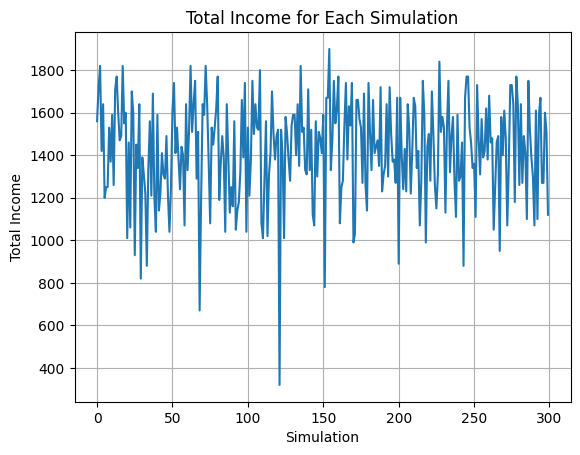

In [7]:
import matplotlib.pyplot as plt

# 繪製折線圖
plt.plot(total_income_list, linestyle='-')
plt.title('Total Income for Each Simulation')
plt.xlabel('Simulation')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()